In [1]:
#workshop 1

In [2]:
y_true = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
y_targets = ['Bad', 'Good']
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

Accuracy Score:  0.7


In [5]:
print(classification_report(y_true, y_pred, target_names=y_targets))

              precision    recall  f1-score   support

         Bad       0.80      0.67      0.73         6
        Good       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [6]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[4 2]
 [1 3]]


In [7]:
#workshop 2

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

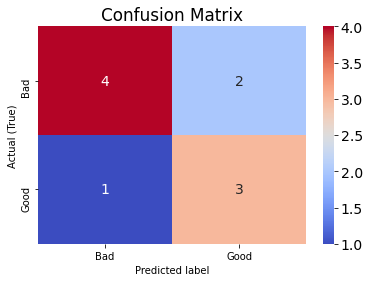

<Figure size 360x288 with 0 Axes>

In [9]:
ax = plt.subplot()
plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 14})
cm = confusion_matrix(y_true, y_pred)
sb.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
y_targets = ['Bad', 'Good']
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual (True)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)
plt.show()

In [10]:
import scikitplot as skplot

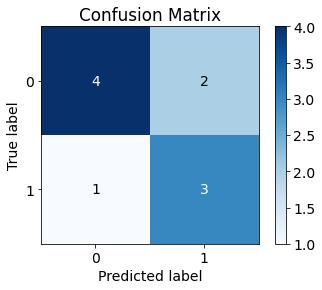

In [11]:
skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
plt.show()

In [12]:
#workshop 3

In [13]:
y_targets = ['Cat', 'Dog', 'Bird']
y_true = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2]
y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2]

In [14]:
print('Accuracy Score: {:.3f}'.format(accuracy_score(y_true, y_pred)))

Accuracy Score: 0.733


In [15]:
print(classification_report(y_true, y_pred, target_names=y_targets))

              precision    recall  f1-score   support

         Cat       0.80      0.67      0.73         6
         Dog       0.50      0.75      0.60         4
        Bird       1.00      0.80      0.89         5

    accuracy                           0.73        15
   macro avg       0.77      0.74      0.74        15
weighted avg       0.79      0.73      0.75        15



In [16]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[4 2 0]
 [1 3 0]
 [0 1 4]]


[Text(0, 0.5, 'Cat'), Text(0, 1.5, 'Dog'), Text(0, 2.5, 'Bird')]

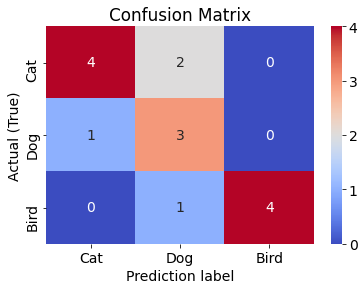

In [17]:
ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5, 4
plt.rcParams.update({'font.size':14})
sb.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
ax.set_xlabel('Prediction label')
ax.set_ylabel('Actual (True)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)

In [18]:
#workshop 4

In [19]:
import pandas as pd

In [20]:
# df = pd.read_csv('~/Desktop/my_machine_learning/csv/simple_loan.csv')
df = pd.read_csv('C:/Users/WIN10/Desktop/my_machine_learning/csv/simple_loan.csv')
df = df[:10]
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [21]:
X = df[['age', 'employed', 'own_house', 'credit']]
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape

((7, 4), (3, 4))

In [24]:
X_train

,age,employed,own_house,credit
5,middle,False,n,fair
0,young,False,n,fair
3,young,True,y,fair
8,middle,False,y,excellent
7,middle,True,y,good
9,middle,False,y,excellent
1,young,False,n,good


In [25]:
X_test

,age,employed,own_house,credit
4,young,False,n,fair
2,young,True,n,good
6,middle,False,n,good


In [26]:
#workshop 5

In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('C:/Users/WIN10/Desktop/my_machine_learning/csv/simple_loan.csv')
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [46]:
df.shape

(17, 5)

In [47]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [48]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

In [49]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [50]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [51]:
def labelEncode(data, columns):
    for i in columns:
        data[i + '_'], _ = pd.factorize(data[i], sort=True)

In [52]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)
df['target_'], class_names = pd.factorize(df.target)
df.sample(5)

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
10,old,False,y,excellent,yes,1,0,1,0,1
7,middle,True,y,good,yes,0,1,1,2,1
16,young,True,y,fair,yes,2,1,1,1,1
13,old,True,n,excellent,yes,1,1,0,0,1
11,old,False,y,good,yes,1,0,1,2,1


In [53]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

In [54]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns]
X.head()

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


In [55]:
y = df['target_']
y[:5]

0    0
1    0
2    1
3    1
4    0
Name: target_, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [62]:
X_train.shape, X_test.shape

((11, 4), (6, 4))

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
model.score(X_test,y_test)

0.8333333333333334

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
y_pred = model.predict(X_test)

In [73]:
print('Score: {:.3f}'.format(model.score(X_test, y_test)))
print('Accuracy Score: ', accuracy_score(y_test, y_pred).round(3))

Score: 0.833
Accuracy Score:  0.833


In [75]:
class_names = ['no', 'yes']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

          no       0.75      1.00      0.86         3
         yes       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [76]:
cn = confusion_matrix(y_test, y_pred)
cn

array([[3, 0],
       [1, 2]], dtype=int64)

In [77]:
import scikitplot as skplot

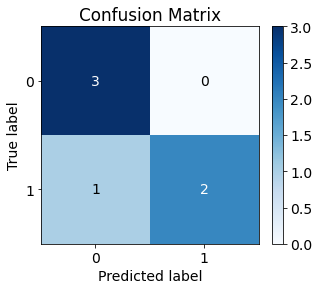

In [78]:
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [79]:
model.feature_importances_

array([0.    , 0.3125, 0.    , 0.6875])

In [80]:
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0
5,middle,False,n,fair,no,0,0,0,1,0
6,middle,False,n,good,no,0,0,0,2,0
7,middle,True,y,good,yes,0,1,1,2,1
8,middle,False,y,excellent,yes,0,0,1,0,1
9,middle,False,y,excellent,yes,0,0,1,0,1


In [81]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_pred = model.predict(X_input)
y_pred

array([1, 0, 1, 0], dtype=int64)

In [82]:
for i in y_pred:
    print('Result: {}'.format(class_names[i]))

Result: yes
Result: no
Result: yes
Result: no
